In [15]:
# We can use PCA to calculate a projection of a dataset and select a number of dimensions 
# or principal components of the projection to use as input to a model.

# In this example we will experiment with PCA and logistic regression.
# We will evaluate the performance of logistic regression on a synthetic dataset
# for various numbers of principal components.

from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# Create a synthetic dataset 
# In our example we create a dataset with 1000 examples and 20 input features.
# That is, the dataset dimension is 20.
# Out of those 20, 15 inputs are "meaningful".
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)

# Summarize the dataset
print(X.shape, y.shape)




(1000, 20) (1000,)


In [6]:
# Create a list of models to experiment with
# We will create 20 models. Each model will take as input a different number of principal components.
# (i.e., only one component as input, two components, three,...,twenty)
def get_models():
    models = dict()
    for i in range(1,21):
        # This way we essentially define a two-step process:
        # Perform PCA and use the output of PCA as input to logistic regrassion
        steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
        models[str(i)] = Pipeline(steps=steps)
    return models

In [7]:
# Evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

>1 0.542 (0.048)
>2 0.713 (0.048)
>3 0.720 (0.053)
>4 0.723 (0.051)
>5 0.725 (0.052)
>6 0.730 (0.046)
>7 0.805 (0.036)
>8 0.800 (0.037)
>9 0.814 (0.036)
>10 0.816 (0.034)
>11 0.819 (0.035)
>12 0.819 (0.038)
>13 0.819 (0.035)
>14 0.853 (0.029)
>15 0.865 (0.027)
>16 0.865 (0.027)
>17 0.865 (0.027)
>18 0.865 (0.027)
>19 0.865 (0.027)
>20 0.865 (0.027)


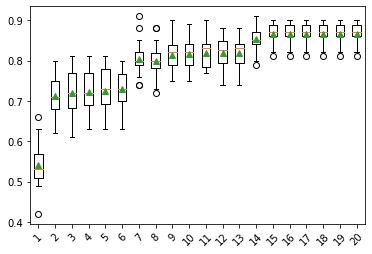

In [11]:
# Get the models
models = get_models()

# Evaluate the models and store results
results = []
names = []
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    
# Plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

In [9]:
# We see a general trend of increased performance as the number of dimensions is increased. 
# On this dataset, the results suggest a trade-off in the number of dimensions vs. the classification accuracy 
# of the model.

# Interestingly, we don’t see any improvement beyond 15 components. 
# This matches our definition of the problem where only the first 15 components contain information 
# about the class and the remaining five are redundant.